In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
brand = "hul"
data = pd.read_csv("brands/" + brand + '/ratings/ratings_020719.csv', delimiter=',', encoding="utf-8-sig")

brands = list(set(data['brand'].tolist()))
brands.sort()
print(brands)
count_by_brands = data.groupby(['brand'])['total','5*','4*','3*','2*','1*'].sum()

#count_by_brands.sort_values(by=['total'],ascending=False)
count_by_brands['brands'] = brands
count_by_brands

['Aviance', 'Axe', 'Brylcreem', 'Cif', 'Clear', 'Closeup', 'Comfort', 'Dove', 'Elle 18', 'Fair & Lovely', 'Hamam', 'Indulekha', 'Lakme', 'Lever ayush', 'Lifebuoy', 'Liril', 'Lux', 'Pears', 'Pepsodent', 'Ponds', 'Pure Derm', 'Pure IT', 'Rin', 'Sunsilk', 'Surf Excel', 'TIGI', 'TRESemme', 'Toni&Guy', 'Vaseline', 'Vim']


,total,5*,4*,3*,2*,1*,brands
brand,,,,,,,
Aviance,30,9,4,4,6,7,Aviance
Axe,4177,2221,851,424,187,494,Axe
Brylcreem,2265,1191,477,291,112,194,Brylcreem
Cif,398,229,86,46,11,26,Cif
Clear,9772,5891,2198,896,310,477,Clear
Closeup,38,19,7,2,3,7,Closeup
Comfort,199,104,37,34,7,17,Comfort
Dove,41272,24965,9361,3852,1246,1848,Dove
Elle 18,2139,1211,522,233,66,107,Elle 18


In [6]:
uc = pd.value_counts(data['brand'].values, sort=True)

import numpy as np
print(np.corrcoef(uc, count_by_brands['total']))

[[ 1.         -0.03053639]
 [-0.03053639  1.        ]]


Populating the interactive namespace from numpy and matplotlib
brand
Aviance              30
Axe                4181
Brylcreem          2270
Cif                 398
Clear              9800
Closeup              38
Comfort             200
Dove              41380
Elle 18            2139
Fair & Lovely      3111
Hamam                27
Indulekha          7444
Lakme            151682
Lever ayush         710
Lifebuoy             63
Liril               527
Lux                2047
Pears              3688
Pepsodent             5
Ponds             13629
Pure Derm            21
Pure IT            2761
Rin                 233
Sunsilk           13566
Surf Excel          730
TIGI                831
TRESemme          29371
Toni&Guy           1267
Vaseline          48943
Vim                 131
Name: total, dtype: int64


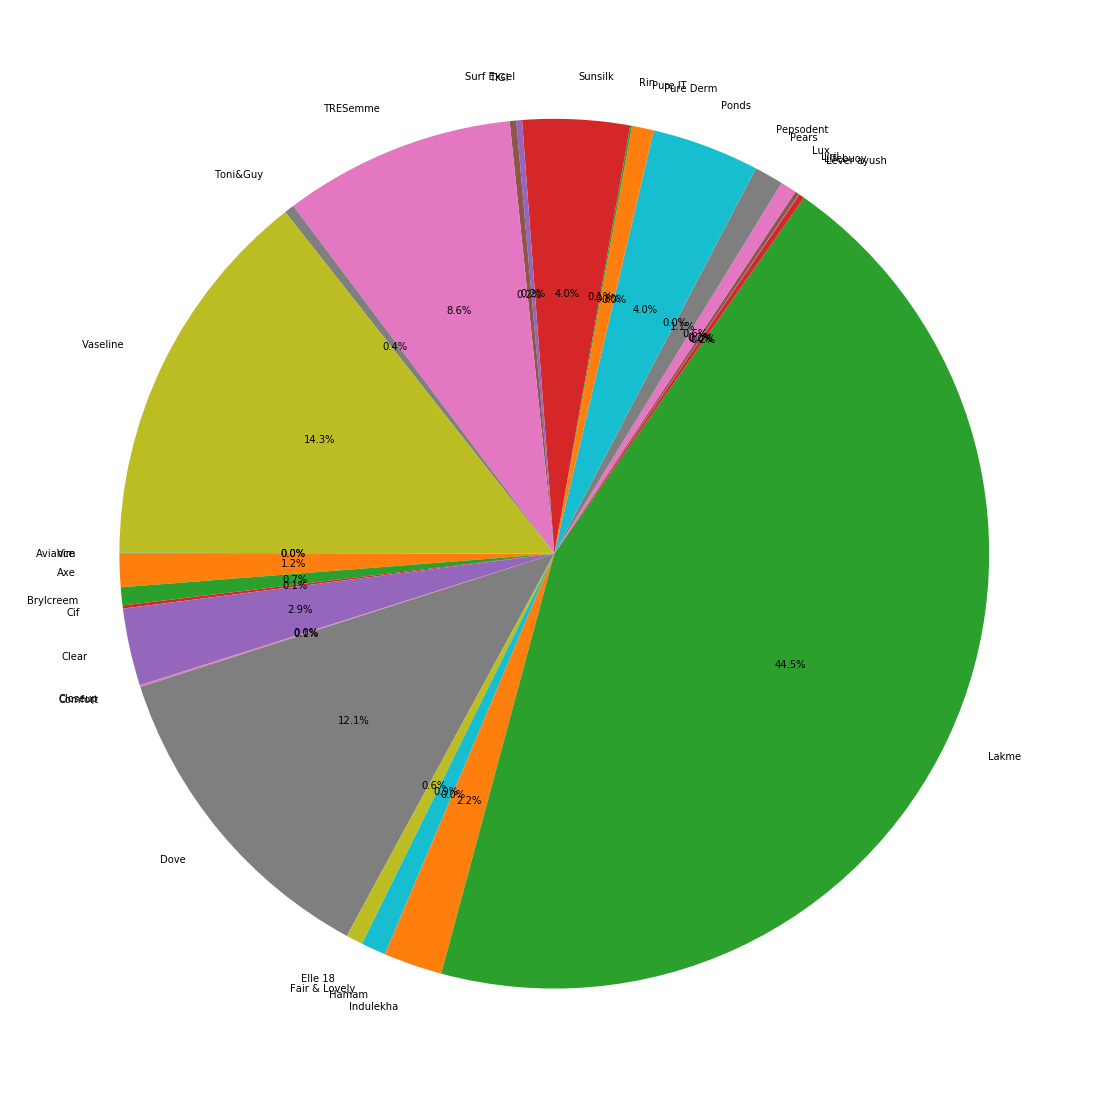

In [12]:
%pylab inline
pylab.rcParams['figure.figsize'] = (25, 20)

labels = count_by_brands['brands']
total = count_by_brands['total']
print(total)
five_star = count_by_brands['5*']
four_star = count_by_brands['4*']
three_star = count_by_brands['3*']
two_star = count_by_brands['2*']
one_star = count_by_brands['1*']
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "yellow", "purple"]
plt.pie(total, labels=labels, autopct='%1.1f%%',startangle=180)
#plt.title("The % of user reviews with respect to\n"+" number of reviews and whether reviews are +ve or -ve\n\n\n")
plt.show()

In [13]:
import collections

def product_nps(df):
    one_rating = df['1*'].tolist()
    two_rating = df['2*'].tolist()
    three_rating = df['3*'].tolist()
    four_rating = df['4*'].tolist()
    five_rating = df['5*'].tolist()
    nps = []
    for i in range(0,len(five_rating)):
        promoters = five_rating[i]
        detractors = one_rating[i] + two_rating[i]
        total_content = one_rating[i] + two_rating[i] + three_rating[i] + four_rating[i] + five_rating[i]
        product_nps = ((promoters-detractors)/total_content)*100
        nps += [product_nps]
    return nps

def brand_nps(data, count_df):
    total_products_content = count_df['total']
    counts = dict(zip(count_df['brands'].tolist(),count_df['total'].tolist()))
    print(counts)
    nps = data['nps'].tolist()
    buzz = data['total'].tolist()
    brands = data['brand'].tolist()
    summ_dict = dict()
    summ = 0
    for i in range(0,len(nps)):
        try:
            weight = buzz[i]/counts[brands[i]]
            summ += (nps[i]*weight)
            if(brands[i+1]!=brands[i]):
                summ_dict[brands[i]] = summ
                summ = 0
            #f(brands[i]=="Whisper"):
            #print(brands[i],summ,weight,nps[i],nps[i]*weight)
        except:
            summ_dict[brands[i-1]] = summ 
            return summ_dict
        
def company_nps(df):
    nps = df['nps'].tolist()
    brand_buzz = df['total'].tolist()
    total = df['total'].sum()
    company_nps = 0
    for i in range(0,len(nps)):
        company_nps += nps[i]*(brand_buzz[i]/total)

    return company_nps

data = data[['brand','total','5*','4*','3*','2*','1*']]
data['nps'] = product_nps(data)



nps_dict = brand_nps(data, count_by_brands)
nps_dict = collections.OrderedDict(sorted(nps_dict.items()))
count_by_brands['nps'] = list(nps_dict.values())
print(data[['brand','total','nps']])
print(count_by_brands[['total','nps']])
print(company_nps(count_by_brands))


{'Aviance': 30, 'Axe': 4181, 'Brylcreem': 2270, 'Cif': 398, 'Clear': 9800, 'Closeup': 38, 'Comfort': 200, 'Dove': 41380, 'Elle 18': 2139, 'Fair & Lovely': 3111, 'Hamam': 27, 'Indulekha': 7444, 'Lakme': 151682, 'Lever ayush': 710, 'Lifebuoy': 63, 'Liril': 527, 'Lux': 2047, 'Pears': 3688, 'Pepsodent': 5, 'Ponds': 13629, 'Pure Derm': 21, 'Pure IT': 2761, 'Rin': 233, 'Sunsilk': 13566, 'Surf Excel': 730, 'TIGI': 831, 'TRESemme': 29371, 'Toni&Guy': 1267, 'Vaseline': 48943, 'Vim': 131}
         brand  total         nps
0          Cif      5    0.000000
1          Cif     22   54.545455
2          Cif      4   50.000000
3          Cif      3   66.666667
4          Cif     16   56.250000
5          Cif      5   60.000000
6          Cif     16   37.500000
7          Cif     10   60.000000
8          Cif      3  100.000000
9          Cif      5   20.000000
10         Cif      4   50.000000
11         Cif      8   75.000000
12         Cif     76   48.684211
13         Cif     14   21.428571
14    

Hindustan Unilever
[[ 1.         -0.97052413]
 [-0.97052413  1.        ]]


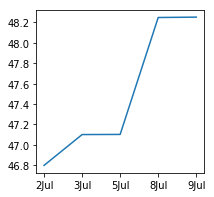

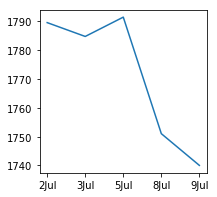

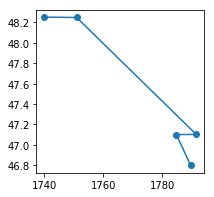



Procter & Gamble
[[1.         0.08611884]
 [0.08611884 1.        ]]


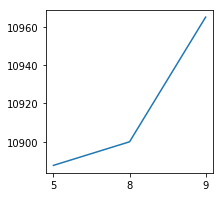

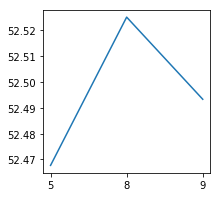

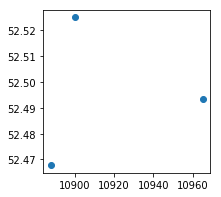

In [168]:
pylab.rcParams['figure.figsize'] = (3, 3)

import numpy as np
dates = ["2Jul","3Jul","5Jul","8Jul","9Jul"]

stock_hul = [1789.50,1784.70,1791.40,1751.00,1740.00]
nps_hul = [46.7976,47.0988,47.1011,48.2473,48.2509]

stock_pg = [10887.70,10900.00,10965.05]
nps_pg = [52.4677,52.5251,52.4933]

print("Hindustan Unilever")
print(np.corrcoef(nps_hul, stock_hul))
plt.plot(dates,nps_hul,'-')
plt.show()
plt.plot(dates,stock_hul,'-')
plt.show()
plt.plot(stock_hul,nps_hul,'o-')
plt.show()

print("\n\nProcter & Gamble")
print(np.corrcoef(nps_pg, stock_pg))
plt.plot(["5","8","9"],stock_pg,'-')
plt.show()
plt.plot(["5","8","9"],nps_pg,'-')
plt.show()
plt.plot(stock_pg,nps_pg,'o')
plt.show()

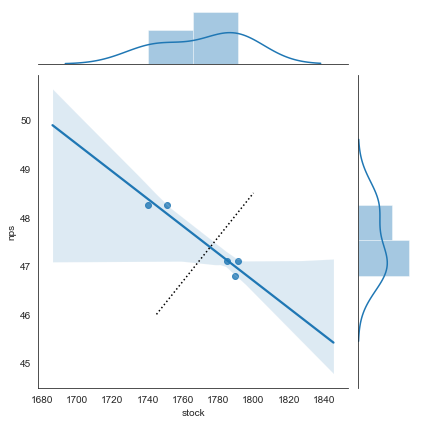

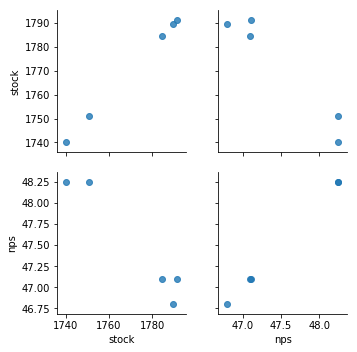

In [170]:
pylab.rcParams['figure.figsize'] = (10, 10)

import seaborn as sns

nps_data = pd.DataFrame()
nps_data['stock'] = stock_hul
nps_data['nps'] = nps_hul
#sns.swarmplot(x="stock", y="nps", data=nps_data)

with sns.axes_style('white'):
    g = sns.jointplot("stock", "nps", nps_data, kind='reg')
    g.ax_joint.plot(np.linspace(1745, 1800),
                    np.linspace(46, 48.5), ':k')
    plt.show()
    
g = sns.PairGrid(nps_data, vars=['stock','nps'], palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
plt.show()

In [15]:
views_6_months = [239,209.5,192.5,221.5,202,220]
conversion_rate = 3.3
total_products = 100
product_page_view = 43.8

product_purchase_proba = (product_page_view/total_products)*(conversion_rate/total_products)
prods_sold = round(product_purchase_proba*total_products*total_products)

print(str(prods_sold)+" products sold after every 10000 site views")



145 products sold after every 10000 site views


In [19]:
'''For 6 months'''
total_views = sum(views_6_months*1000000)
print("Site visits in 6 months \t: " + str(int(total_views)))

total_products_sold = round(prods_sold*total_views/total_products**2)
print("Products sold in 6 months\t: " + str(int(total_products_sold)))

products_one_month = round(total_products_sold/6)
print("Products sold in 1 month \t: " + str(int(products_one_month)))

daily_sales = round(products_one_month/30)
print("Products sold on a day   \t: " + str(int(daily_sales)))

year_wise_list = [0.05,9,1000,3500,7249.5,13291,21000,30111,45000,60000,75000,90000,103474]
total_products_sold = []


for prod in year_wise_list:
    total_products_sold += [prod*365]
    
years = [2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
    
print("Total products sold in 10 years : " + str(int(sum(total_products_sold))))

Site visits in 6 months 	: 1284500000
Products sold in 6 months	: 18625250
Products sold in 1 month 	: 3104208
Products sold on a day   	: 103474
Total products sold in 10 years : 164116610


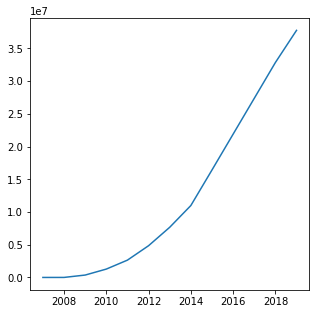

In [20]:
pylab.rcParams['figure.figsize'] = (5, 5)

plt.plot(years,total_products_sold,'-')

In [21]:
brands = 17697
best_case = 0.6
avg_case = 0.4
worst_case = 0.2

best_case_brands = best_case*brands
avg_case_brands = avg_case*brands
worst_case_brands = worst_case*brands

bc_sold = int(sum(total_products_sold)/best_case_brands)
ac_sold = int(sum(total_products_sold)/avg_case_brands)
wc_sold = int(sum(total_products_sold)/worst_case_brands)

print("Best Case\t: " + str(bc_sold))
print("Average Case\t: " + str(ac_sold))
print("Worst Case\t: " + str(wc_sold))

Best Case	: 15456
Average Case	: 23184
Worst Case	: 46368


In [22]:
count_by_brands['required'] = count_by_brands['total'] - ac_sold

In [23]:
count_by_brands

,total,5*,4*,3*,2*,1*,brands,nps,required
brand,,,,,,,,,
Aviance,30,9,4,4,6,7,Aviance,-3.278167,-23154
Axe,4181,2226,850,425,187,493,Axe,42.344229,-19003
Brylcreem,2270,1193,478,292,113,194,Brylcreem,38.525950,-20914
Cif,398,230,86,46,11,25,Cif,38.944724,-22786
Clear,9800,5907,2209,899,311,474,Clear,42.142857,-13384
Closeup,38,19,7,2,3,7,Closeup,8.017186,-23146
Comfort,200,104,37,34,7,18,Comfort,50.298995,-22984
Dove,41380,25049,9392,3868,1248,1823,Dove,51.906967,18196
Elle 18,2139,1213,521,233,66,106,Elle 18,54.519424,-21045


In [26]:
import numpy as np
import pandas as pd
a = 1 
b = 3
a + b

4